In [2]:
## imports
import pandas as pd
import numpy as np
import plotnine
from plotnine import *

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
## load data on 2020 crimes in DC
dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()
dc_crim_2020.shape
dc_crim_2020.info()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.019902,38.904911,21400002,2020/12/26 16:24:52+00,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF 6TH STREET NW,398273.92,137449.76,...,004802 2,4802.0,Precinct 18,38.904903,-77.019900,NaN,2020/12/23 23:00:00+00,2020/12/23 23:30:00+00,281344403,NaN
1,-77.036508,38.915939,21400006,2020/12/22 14:22:38+00,DAY,OTHERS,THEFT F/AUTO,1900 - 1926 BLOCK OF 16TH STREET NW,396834.05,138674.39,...,004300 1,4300.0,Precinct 141,38.915931,-77.036506,NaN,2020/12/22 08:00:00+00,2020/12/22 08:05:00+00,281344404,NaN
2,-76.989960,38.902490,21400030,2020/12/25 13:58:41+00,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF K STREET NE,400871.08,137180.84,...,008410 1,8410.0,Precinct 82,38.902482,-76.989958,NaN,2020/12/24 13:00:00+00,2020/12/24 14:00:00+00,281344409,NaN
3,-77.020537,38.960172,21400099,2020/12/29 21:25:29+00,EVENING,OTHERS,THEFT/OTHER,500 - 599 BLOCK OF NICHOLSON STREET NW,398220.26,143584.21,...,001901 1,1901.0,Precinct 58,38.960164,-77.020535,NaN,2020/12/29 03:00:00+00,2020/12/29 21:00:00+00,281344956,NaN
4,-77.001303,38.919507,21400121,2020/12/27 01:46:32+00,EVENING,OTHERS,THEFT/OTHER,300 - 399 BLOCK OF RHODE ISLAND AVENUE NE,399887.24,139069.89,...,009203 2,9203.0,Precinct 74,38.919499,-77.001300,NaN,2020/12/20 23:30:00+00,2020/12/21 14:00:00+00,281344958,NaN


(27912, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27912 entries, 0 to 27911
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     27912 non-null  float64
 1   Y                     27912 non-null  float64
 2   CCN                   27912 non-null  int64  
 3   REPORT_DAT            27912 non-null  object 
 4   SHIFT                 27912 non-null  object 
 5   METHOD                27912 non-null  object 
 6   OFFENSE               27912 non-null  object 
 7   BLOCK                 27912 non-null  object 
 8   XBLOCK                27912 non-null  float64
 9   YBLOCK                27912 non-null  float64
 10  WARD                  27912 non-null  int64  
 11  ANC                   27912 non-null  object 
 12  DISTRICT              27883 non-null  float64
 13  PSA                   27877 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  27912 non-null  object 
 15  BLOCK_GROUP        

# Example of creating a table to export to latex

In [4]:
method_v_offense = pd.crosstab(dc_crim_2020.METHOD, 
                              dc_crim_2020.OFFENSE)
method_v_offense

## method 1- transpose and print a table to console to copy/paste
print(method_v_offense.T.to_latex(index = True, caption = "Types of weapons in offenses",
                                 label = "tab:method_offense"))

## method 2- write .tex to folder and upload to overleaf/reference the tex file directly 
method_v_offense.T.to_latex("methodoffense.tex", 
                            index = True, caption = "Types of weapons in offenses",
                            label = "tab:method_offense_written")


## for method 2, if working with latex locally, can also then
## just reference the filepath directly rather than uploading to overleaf

OFFENSE,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
METHOD,,,,,,,,,
GUN,0,846,15,167,3,982,8,3,7
KNIFE,0,476,2,9,3,122,10,2,17
OTHERS,13,309,1425,19,3251,893,160,8270,10900


\begin{table}
\centering
\caption{Types of weapons in offenses}
\label{tab:method_offense}
\begin{tabular}{lrrr}
\toprule
METHOD &  GUN &  KNIFE &  OTHERS \\
OFFENSE                    &      &        &         \\
\midrule
ARSON                      &    0 &      0 &      13 \\
ASSAULT W/DANGEROUS WEAPON &  846 &    476 &     309 \\
BURGLARY                   &   15 &      2 &    1425 \\
HOMICIDE                   &  167 &      9 &      19 \\
MOTOR VEHICLE THEFT        &    3 &      3 &    3251 \\
ROBBERY                    &  982 &    122 &     893 \\
SEX ABUSE                  &    8 &     10 &     160 \\
THEFT F/AUTO               &    3 &      2 &    8270 \\
THEFT/OTHER                &    7 &     17 &   10900 \\
\bottomrule
\end{tabular}
\end{table}



/var/folders/1y/tx5xv7mx325cz5z1q7xc35sm0000gn/T/ipykernel_81230/1184845622.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
/var/folders/1y/tx5xv7mx325cz5z1q7xc35sm0000gn/T/ipykernel_81230/1184845622.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


## Example of creating a figure to export 


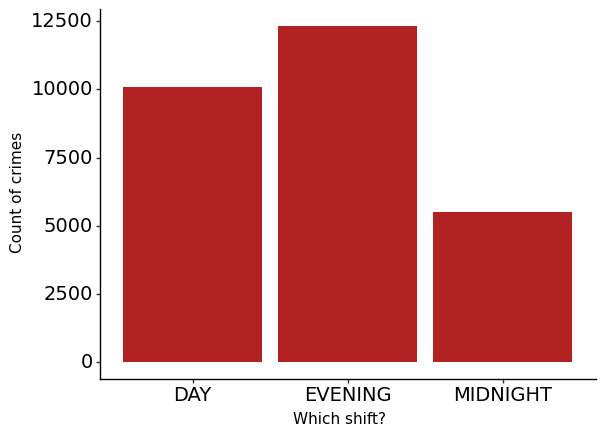

<ggplot: (686828202)>

In [5]:
## create a fig with the count of crimes by shift 

count_byshift = pd.DataFrame(dc_crim_2020.groupby('SHIFT')['CCN'].nunique()).reset_index()

plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
                                       y = 'CCN')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts

## method 1- (would avoid)- can left click and save image

## method 2 - write image
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)

# Activity 

1. The previous table you exported shows the COUNT of methods used by type of offense. Export a new Table to your LaTeX doc that contains the PROPORTION that each method represents for each offense (eg 80+% of homicides are with a gun as the method). Hint: you can use the normalize parameter within the pd.crosstab command for this: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html. Make sure the proportions for each offense type (eg homicides) sums to 1

2. Create the same shift versus count of crimes plot but just for Ward 2 (the ward where Georgetown is located). Save it as plot_shifts_ward2.png and import into your LaTeX memo/summarize with a caption

3. **Challenge exercise**: an analyst on a different team wants a breakdown of how the workload varies by shift. They want a separate figure showing the count of crimes on the y axis and shift on the x axis for each of the wards. Using a user-defined function that creates a plot for ONE WARD, write a separate bar plot for each WARD and make sure to programatically change the name of the plot filename so you know which is which. 

In [19]:
### crosstab and normalize by columns
method_v_offense_prop = pd.crosstab(dc_crim_2020["METHOD"], dc_crim_2020["OFFENSE"], normalize = 'columns')

## printing result
method_v_offense_prop.T

## writing result
method_v_offense_prop.T.to_latex("methodoffense_prop.tex", 
                            index = True, caption = "Prop of weapons in offenses",
                            label = "tab:method_offense_prop")

METHOD,GUN,KNIFE,OTHERS
OFFENSE,,,
ARSON,0.000000,0.000000,1.000000
ASSAULT W/DANGEROUS WEAPON,0.518700,0.291845,0.189454
BURGLARY,0.010402,0.001387,0.988211
HOMICIDE,0.856410,0.046154,0.097436
MOTOR VEHICLE THEFT,0.000921,0.000921,0.998158
ROBBERY,0.491738,0.061092,0.447171
SEX ABUSE,0.044944,0.056180,0.898876
THEFT F/AUTO,0.000363,0.000242,0.999396
THEFT/OTHER,0.000641,0.001556,0.997803


/var/folders/1y/tx5xv7mx325cz5z1q7xc35sm0000gn/T/ipykernel_81230/1637266290.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
